# knee

handles multi-scale fractal dynamics

- especially problematic with high-freq range:
    - "Some neuronal signals have different frequency scaling properties for different frequency ranges (Hwa and Ferree, 2002; Miller et al., 2009; Robinson, 2003)" (Wen & Liu, 2015)
- IRASA smears results at "inflection point" of the multiple scales
- relevance in FOOOF formula: modeled as k, which optimizes at which frequency the power behaves more and more like 1/f and thus becomes less flat


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ap_with_chi_k(chi, k, b=1):
    """
    Plot the aperiodic power (AP) as a function of frequency for given chi and k values.
    
    Parameters:
    - chi: Exponent value
    - k: Knee parameter value
    - b: Offset parameter, default is 1
    """
    F = np.linspace(2, 40, 500)  # Frequency range from 2 to 40 Hz
    AP = 10**b / (k + F**chi)
    
    plt.figure(figsize=(10, 5))
    plt.plot(F, AP)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Log-Log Plot of AP = $10^{b} * \\frac{{1}}{{(k + F^{{\chi}})}}$ for $\chi$={chi}, $k$={k}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('AP')
    plt.show()

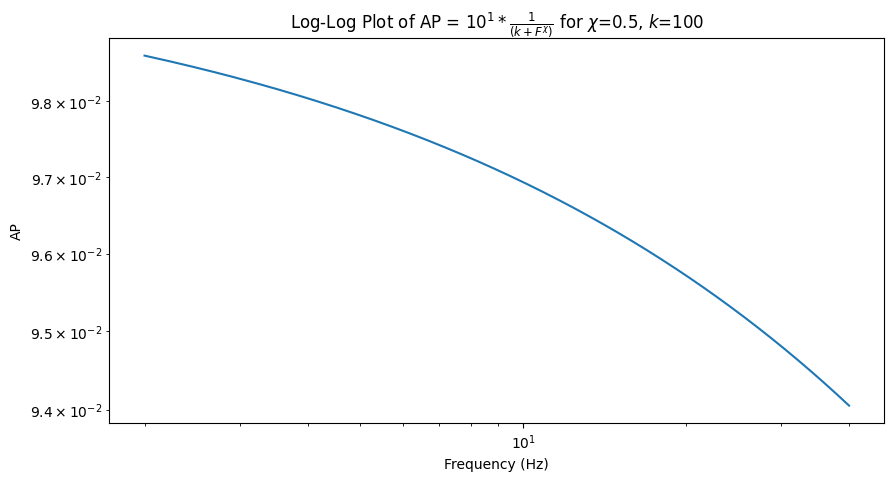

In [13]:
plot_ap_with_chi_k(chi=0.5, k=10**2)

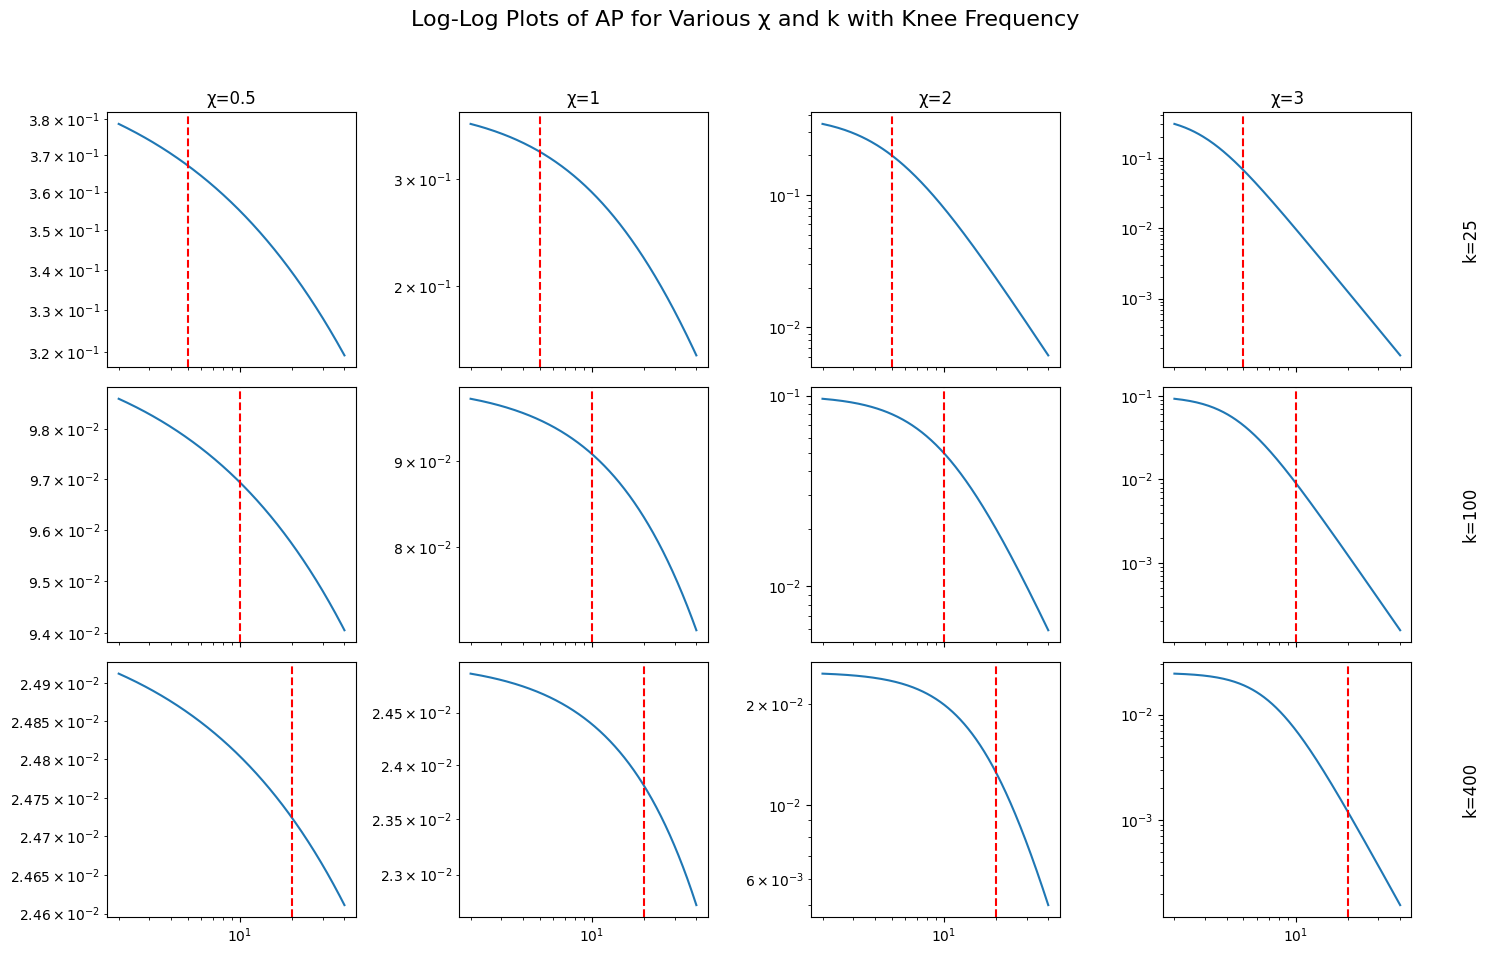

In [26]:
# Re-importing necessary libraries and redefining variables after the reset
import numpy as np
import matplotlib.pyplot as plt

# Redefining the parameters and the plot with the requested adjustments
chi_values = [0.5, 1, 2, 3]  # Chi values
k_values = [5**2, 10**2, 20**2]  # K values
F = np.linspace(2, 40, 500)  # Frequency range
b = 1  # Offset parameter

fig, axs = plt.subplots(len(k_values), len(chi_values), figsize=(15, 10), sharex='col')

# Labeling chi values on the top row
for j, chi in enumerate(chi_values):
    axs[0, j].set_title(f'χ={chi}', fontsize=12)

# Moving "k = " labels to the right side of the subplots
for i, k in enumerate(k_values):
    axs[i, -1].text(1.2, 0.5, f'k={k}', transform=axs[i, -1].transAxes, fontsize=12, 
                    va='center', ha='left', rotation='vertical')

for i, k in enumerate(k_values):
    for j, chi in enumerate(chi_values):
        AP = 10**b / (k + F**chi)
        knee_freq = np.sqrt(k)  # Calculate the knee frequency
        axs[i, j].plot(F, AP)
        axs[i, j].axvline(x=knee_freq, color='r', linestyle='--')  # Mark the knee frequency
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        # axs[i, j].grid(True)  # Add gridlines

fig.suptitle('Log-Log Plots of AP for Various χ and k with Knee Frequency', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title and subplot labels
plt.show()